## 시작전 : 지도 학습(supervised learning)
- $Y=f(x)$에 대하여 입력변수 $(X)$와 출력변수 $(Y)$의 관계에 대하여 모델링하는 것
  - Y에 대하여 예측 또는 분류하는 문제
  - 회귀(regression) : 입력 변수 X에 대해서 연속형 출력 변수 Y를 예측
  - 분류(classfication) : 입력 변수 X에 대해서 이산형 출력 변수 Y를 예측

## 비지도 학습(unsupervised learning)
- 출력 변수 (Y)가 존재하지 않고, 입력변수 (X)간의 관계에 대해 모델링하는 것
- 군집분석 : 유사한 데이터끼리 그룹화
- PCA : 독립변수들의 차원을 축소화

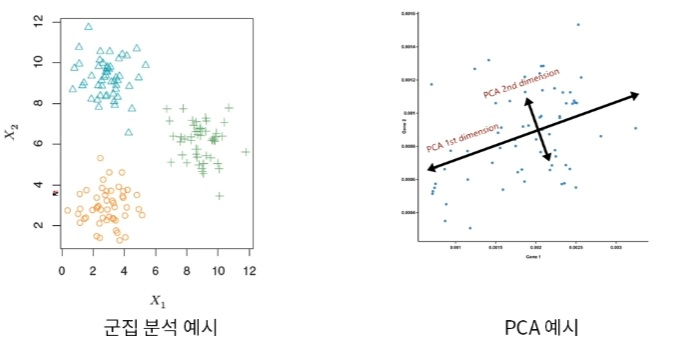

### 군집분석이란(Clustering)
- 각 데이터의 유사성을 측정하여 높은 대상 집단을 분류하고, 군집 간에 상이성을 규명하는 방법
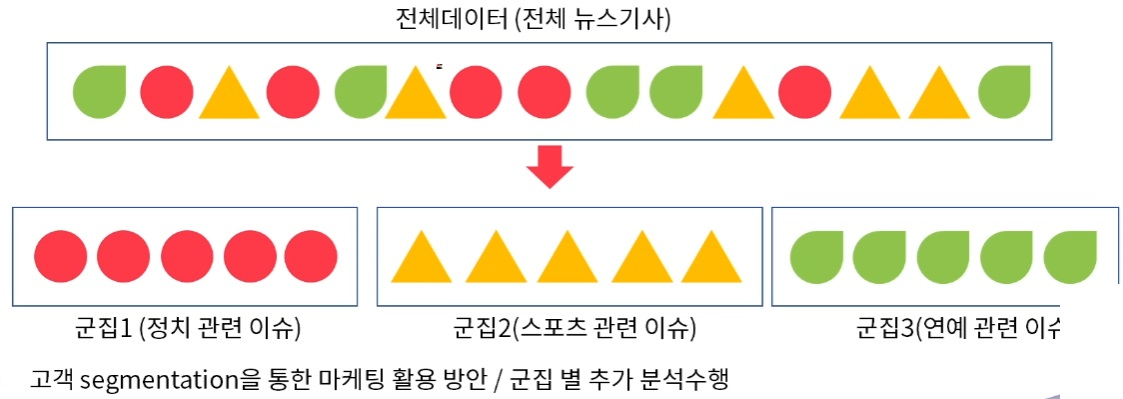

- 유사한 데이터끼리의 특성을 규명하는 것이기 때문에 classfication보다 정확도는 떨어지는 편임

### Clustering의 종류
- K-means clustering : 데이터를 사용자가 지정한 k개의 군집으로 나눔
- Hierarchical clustering(계층적 군집분석) : 나무 모양의 계층 구조를 형성해나가는 방법
- DBSCAN : k개를 설정할 필요 없이 군집화할 수 있는 방법

## K-means clustering

- Step 1 : 각 데이터 포인트 i에 대해 가장 가까운 중심점을 찾고, 그 중심점에 해당하는 군집 할당
- Step 2 : 할당된 군집을 기반으로 새로운 중심 계산, 중심점은 군집 내부 점들 좌표의 평균으로 함
- Step 3 : 각 클러스터의 할당이 바뀌지 않을 때까지 반복
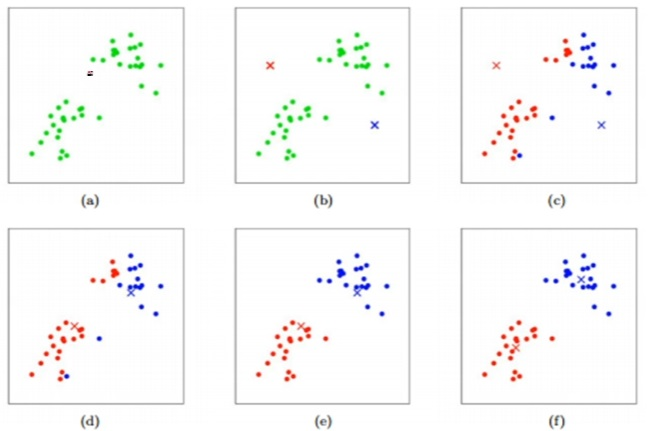

### 점과 점 사이의 거리 측정
- Manhattan distance : 각 축에 대해 수직으로만 이동하여 계산하는 거리 측정 방식
- Euclidean distance : 점과 점 사이의 가장 짧은 거리를 계산하는 거리 측정 방식
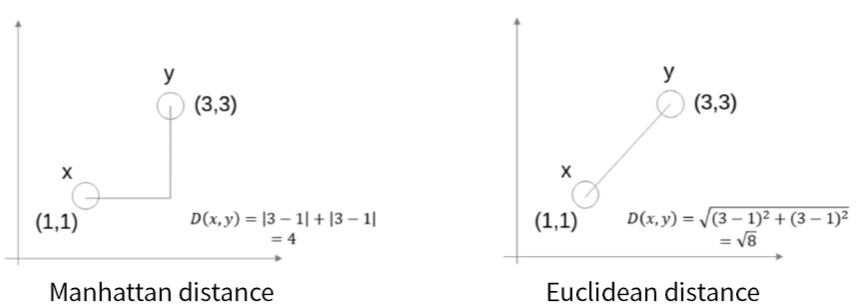

## 최적의 K를 찾는 방법
- 군집의 개수 K는 사용자가 임의로 정하는 것이기 때문에 데이터에 최적화된 k를 찾기 어려움
- K를 설정하는 대표적인 방법은 Elbow method, Silhouette method 등이 있음
### Elbow method : 군집간 분산(Between cluster Sum of Squares)과 전체 분산(TSS = BSS+WSS)의 비율
  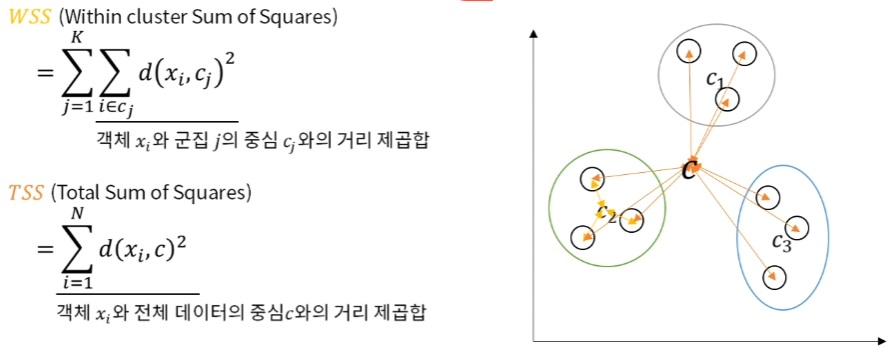

- 군집간 분산과 전체 분산의 비율
  - $ratio=\frac{BSS}{TSS}=\frac{TSS-WSS}{TSS}$
- 비율의 한계 비용(marginal cost)이 줄어드는 지점이 최적의 클러스터 개수
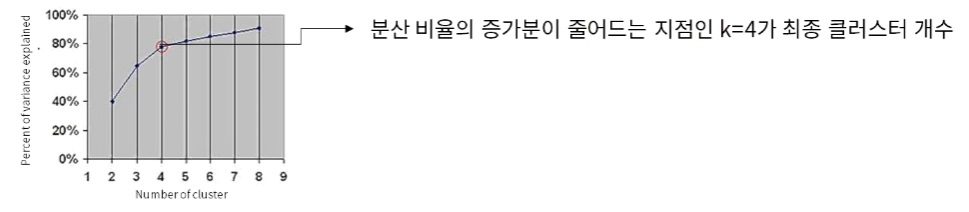

- 또는 WWS를 통해 비율의 한계 비용(marginal cost)이 줄어드는 시점이 최적의 클러스터 개수

### Silhouette method
- 객체와 그 객체가 속한 군집의 데이터들과의 비유사성(dissimilarity)를 계산하는 방법
- elbow method에 비해 상대적으로 간단함
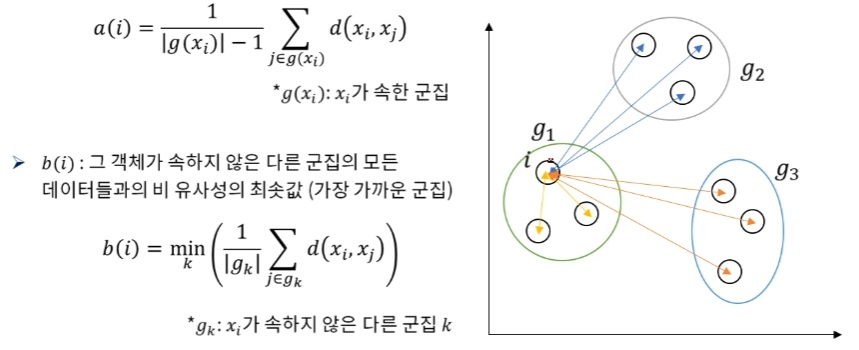
- a(i) : 객체 i와 그 객체가 속한 군집의 데이터들과의 비유사성

- 이렇게 a(i)와 b(i)가 정의되었을 때, 실루엣 s(i)는 다음과 같이 계산함
-$s(i)=\frac{b(i)-a(i)}{max(a(i),b(i))}, where -1 \leq s(i) \leq 1$
  - s(i)의 값이 1에 가까울수록 객체 i는 올바른 클러스터에 분류된 것
- k를 증가시켜가며 평균 실루엣 값이 최대가 되는 k를 선택한다.

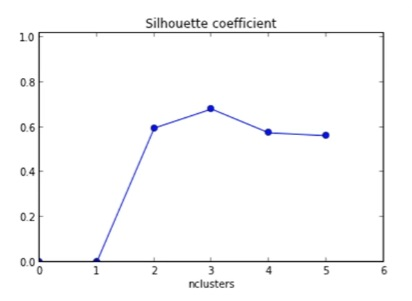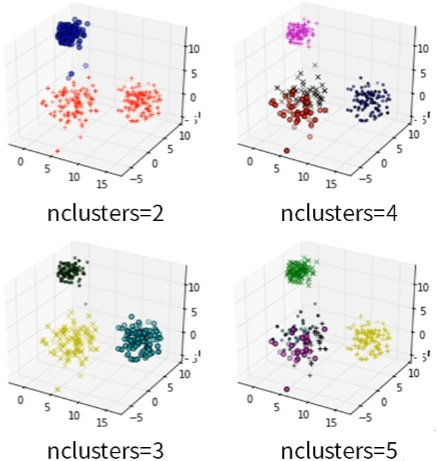

- elbow method를 사용하는 것이 그나마 일반적이지만, **K는 사용자가 알고 있어야 하는 경우가 최적임**
- 거리기반으로 구한 k는 차원이 커질수록 최적의 k가 맞지 않는 경향이 강해진다.
- 초기 중심값에 민감한 반응을 보임
- 노이즈와 아웃라이어(이상치)에 민감함
- 군집의 개수 k를 설정하는 것이 어렵다.
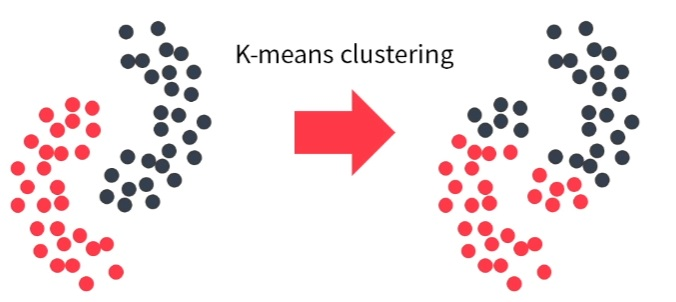

## K-medoids clustering
- 군집의 무게 중심을 구하기 위해 데이터의 평균 대신 중간점(medoids)을 사용(기존 K-means보다 이상치에 강건한 성능)
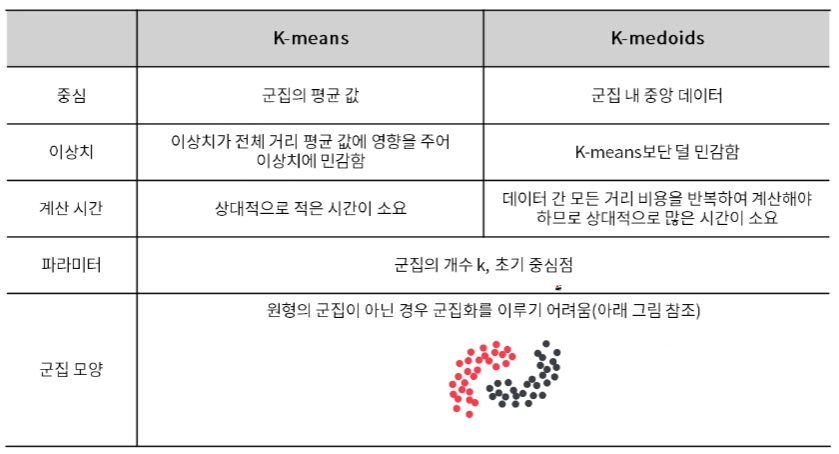

## K-means clustering 실습

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

## Iris 데이터를 활요앟여 Kmeans clustering

In [2]:
iris=datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X=iris.data[:,:2]
y=iris.target

In [5]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

Text(0, 0.5, 'Speal Width')

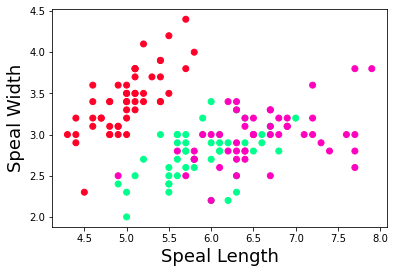

In [7]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='gist_rainbow')
plt.xlabel('Speal Length',fontsize=18)
plt.ylabel('Speal Width',fontsize=18)

In [8]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

C:\Users\mitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=4, random_state=21)

In [9]:
centers = km.cluster_centers_#모든 클러스터의 중앙값 추출
print(centers)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


Text(0.5, 1.0, 'Predicted')

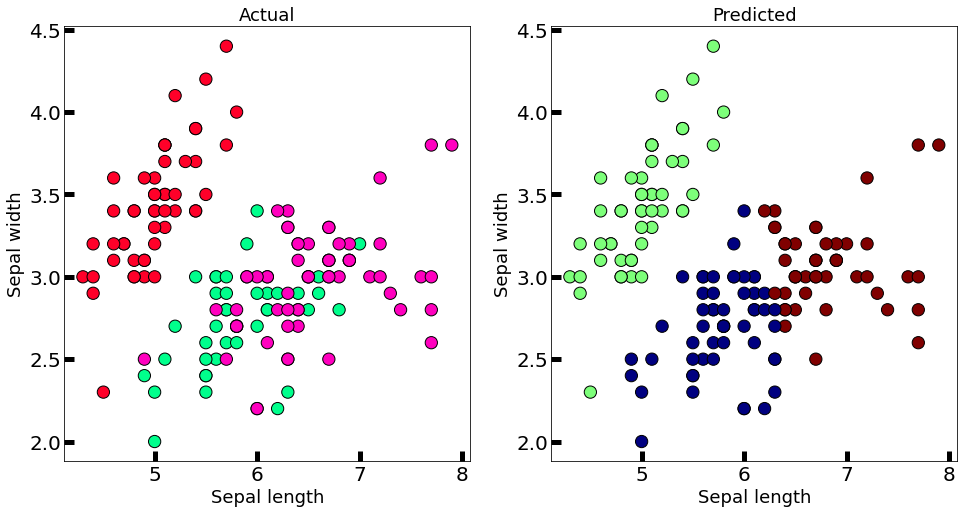

In [10]:
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

## 2차원의 가상 데이터에 Kmeans clustering 해보기

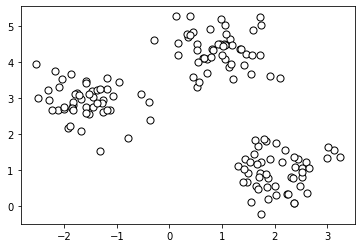

In [11]:
from sklearn.datasets import make_blobs
# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [13]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [14]:
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

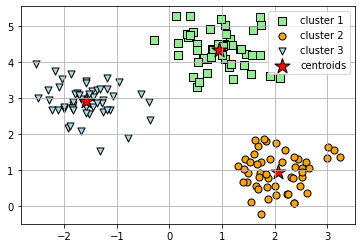

In [15]:

plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## K를 4로 할 경우

In [16]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

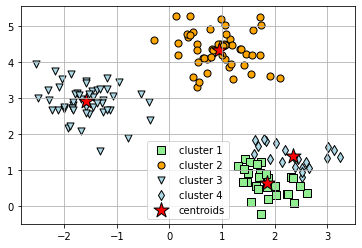

In [17]:

plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='lightblue',
    marker='d', edgecolor='black',
    label='cluster 4'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## elbow method를 이용하여 최적의 k 구하기

C:\Users\mitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


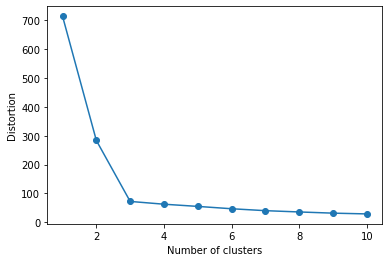

In [18]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

- elbow method를 통해서도 최적의 k가 3임을 알 수 있다.

## k-means clustering를 이용하여 document 군집화하기

In [19]:
 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.","hello kitty is my favorite character",
             "Merley has the best squooshy kitten belly.","Is Google translator so good?","google google"
             "google Translate app is incredible.","My dog s name is Kong","dog dog dog","cat cat"
             "If you open 100 tab in google you get a smiley face.","Kong is a very cute and lovely dog",
             "Best cat photo I've ever taken.","This is a cat house"
             "Climbing ninja cat kitty.","What's your dog's name?","Cat s paws look like jelly",
             "Impressed with google map feedback.","I want to join google","You have to wear a collar when you walk the dog",
             "Key promoter extension for google Chrome.","Google is the best company","Google researcher"]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

 

In [20]:
X.data

array([0.42166366, 0.42166366, 0.42166366, 0.42166366, 0.33316481,
       0.42166366, 0.52527722, 0.52527722, 0.52527722, 0.41503194,
       0.46502628, 0.46502628, 0.46502628, 0.36742648, 0.46502628,
       0.65987374, 0.65987374, 0.35935122, 0.48243568, 0.48243568,
       0.48243568, 0.48243568, 0.26272276, 0.79587603, 0.60545961,
       1.        , 0.3829578 , 0.3829578 , 0.3829578 , 0.3829578 ,
       0.3829578 , 0.3829578 , 0.27670749, 0.20854952, 0.55772163,
       0.55772163, 0.489249  , 0.37219428, 0.49109535, 0.49109535,
       0.49109535, 0.35484266, 0.38802417, 0.46064741, 0.46064741,
       0.66568477, 0.36396664, 1.        , 0.47025206, 0.47025206,
       0.47025206, 0.47025206, 0.33978227, 0.5507688 , 0.5507688 ,
       0.5507688 , 0.29993532, 0.65987374, 0.65987374, 0.35935122,
       0.53874485, 0.53874485, 0.53874485, 0.35953018, 0.48243568,
       0.48243568, 0.48243568, 0.48243568, 0.26272276, 0.72152776,
       0.39292651, 0.57009338, 0.87821982, 0.4782572 ])

In [33]:
X#벡터화된 X가 만들어지는 것을 확인

<19x55 sparse matrix of type '<class 'numpy.float64'>'
	with 74 stored elements in Compressed Sparse Row format>

In [34]:
true_k = 3#하이퍼 파라미터
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [35]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [36]:
model.labels_

array([0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2])

In [37]:
[x for x, y in zip(documents, model.labels_) if  y == 0]

['This little kitty came to play when I was eating at a restaurant.',
 'hello kitty is my favorite character',
 'Merley has the best squooshy kitten belly.',
 "Best cat photo I've ever taken.",
 'This is a cat houseClimbing ninja cat kitty.']

In [38]:
[x for x, y in zip(documents, model.labels_) if  y == 1]

['My dog s name is Kong',
 'dog dog dog',
 'Kong is a very cute and lovely dog',
 "What's your dog's name?",
 'You have to wear a collar when you walk the dog']

In [39]:
[x for x, y in zip(documents, model.labels_) if  y == 2]

['Is Google translator so good?',
 'google googlegoogle Translate app is incredible.',
 'cat catIf you open 100 tab in google you get a smiley face.',
 'Cat s paws look like jelly',
 'Impressed with google map feedback.',
 'I want to join google',
 'Key promoter extension for google Chrome.',
 'Google is the best company',
 'Google researcher']

In [41]:
Y = vectorizer.transform(["chrome browser to open."])#원하고자 하는 문자열을 클러스터화
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["I want to have a dog"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

[2]
[1]
[0]
